# Data Exploration

In [2]:
import pandas as pd        # importing pandas library for dataset easy handling

In [3]:
df = pd.read_csv("Europe Sales Records.csv")

In [4]:
df.head()                 # looking the data structure

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
1,Europe,Bosnia and Herzegovina,Clothes,Online,M,10/14/2013,919133651,11/4/2013,927,109.28,35.84,101302.56,33223.68,68078.88
2,Europe,Austria,Cereal,Offline,C,8/13/2014,987410676,9/6/2014,5616,205.70,117.11,1155211.20,657689.76,497521.44
3,Europe,Bulgaria,Office Supplies,Online,L,10/31/2010,672330081,11/29/2010,6266,651.21,524.96,4080481.86,3289399.36,791082.50
4,Europe,Estonia,Fruits,Online,L,9/28/2016,579463422,11/1/2016,4958,9.33,6.92,46258.14,34309.36,11948.78


In [5]:
df.shape           # dataset shape (no.of rows and columns)

(1330, 14)

In [6]:
df.info()          # checking columns and their data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1330 non-null   object 
 1   Country         1330 non-null   object 
 2   Item Type       1330 non-null   object 
 3   Sales Channel   1330 non-null   object 
 4   Order Priority  1330 non-null   object 
 5   Order Date      1330 non-null   object 
 6   Order ID        1330 non-null   int64  
 7   Ship Date       1330 non-null   object 
 8   Units Sold      1330 non-null   int64  
 9   Unit Price      1330 non-null   float64
 10  Unit Cost       1330 non-null   float64
 11  Total Revenue   1330 non-null   float64
 12  Total Cost      1330 non-null   float64
 13  Total Profit    1330 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 145.6+ KB


In [7]:
df.describe()         # initial statistical summary 

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.330000e+03,1330.000000,1330.000000,1330.000000,1.330000e+03,1.330000e+03,1.330000e+03
mean,5.412048e+08,4949.114286,264.893541,187.246812,1.280919e+06,9.037191e+05,3.772000e+05
std,2.573882e+08,2904.105430,217.323460,176.158873,1.443065e+06,1.134845e+06,3.689833e+05
min,1.006406e+08,2.000000,9.330000,6.920000,5.038200e+02,3.736800e+02,1.301400e+02
25%,3.190004e+08,2360.750000,81.730000,35.840000,2.661169e+05,1.577943e+05,8.482294e+04
50%,5.387164e+08,4958.000000,154.060000,97.440000,7.613049e+05,4.332233e+05,2.735946e+05
75%,7.544628e+08,7458.750000,437.200000,263.330000,1.742756e+06,1.108362e+06,5.476582e+05
max,9.998797e+08,9999.000000,668.270000,524.960000,6.672676e+06,5.248025e+06,1.700449e+06


### Insights:

**The dataset contains a significant spread in sales volume, unit prices, and profits, indicating diverse product categories or market segments.**

**The wide range and high standard deviation in total revenue and profit imply potential outliers or highly profitable transactions that should be investigated further.**

**The fact that the unit price and unit cost differ considerably across the dataset suggests variability in product types, which could be explored in further analysis.**

# Data Quality Assessment

### Syntactic Rules

In [8]:
df.dtypes                   # confirming the data types of each column

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

### Note:
            
        As all the columns are in there perfect data types except order date and ship date column which should be in datetime format but they are in object, so I have changed this in the next step.

In [9]:
date_format = "%m/%d/%Y"  # defining the date formate as you can analyze the date format which is in month/day/year


df['Order Date'] = pd.to_datetime(df['Order Date'], format=date_format)   # changing Orde Date column's Data Type to DateTime


df['Ship Date'] = pd.to_datetime(df['Ship Date'], format=date_format)     # changing Orde Date column's Data Type to DateTime

In [10]:
df.dtypes         # again confirming the data type

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

**successfully converted the tada types**

## Cleaning the column names

In [11]:
# Removing extra spaces and special characters in column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '')    # uses regular expression

df.columns       # calling the df columns


Index(['Region', 'Country', 'Item_Type', 'Sales_Channel', 'Order_Priority',
       'Order_Date', 'Order_ID', 'Ship_Date', 'Units_Sold', 'Unit_Price',
       'Unit_Cost', 'Total_Revenue', 'Total_Cost', 'Total_Profit'],
      dtype='object')

### Semantic Rules

In [12]:
# As I have checked over all data and I didn't find any InConsistency/errored value in data but,
# for confirmation I will Check for Logical Consistency or any errored value in numerical column.

# note : Although the Order_ID column  is numerical but we know it's importance is as object/string

negative_values = df[(df['Units_Sold'] < 0) |
                     (df['Unit_Price'] < 0) |
                     (df['Unit_Cost'] < 0) |
                     (df['Total_Revenue'] < 0) |
                     (df['Total_Cost'] < 0) |
                     (df['Total_Profit'] < 0)]            # checking for negative values

negative_values

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit


**so the above blank result shows that their is no negative value in numerical columns**

In [13]:
# Now Checking the Valid Categorical Values

if 'Region' in df.columns:
    print("Unique values in 'Region':", df['Region'].unique())  #unique values for region


if 'Product_Type' in df.columns:
    print("Unique values in 'Product_Type':", df['Product_Type'].unique())    # unique values for product types


if 'Country' in df.columns:
    print("Unique values in 'Country':", df['Country'].unique())            # unique values for Country
    

if 'Sales_Channel' in df.columns:
    print("Unique values in 'Sales_Channel':", df['Sales_Channel'].unique())            # unique values for Sales_Channel
    

if 'Order_Priority' in df.columns:
    print("Unique values in 'Order_Priority':", df['Order_Priority'].unique())            # unique values for Order_Priority


Unique values in 'Region': ['Europe']
Unique values in 'Country': ['Czech Republic' 'Bosnia and Herzegovina' 'Austria' 'Bulgaria' 'Estonia'
 'Montenegro' 'Luxembourg' 'Switzerland' 'Finland' 'Belgium' 'San Marino'
 'Netherlands' 'Russia' 'Ukraine' 'Latvia' 'Serbia' 'Portugal' 'Poland'
 'Liechtenstein' 'United Kingdom' 'Slovenia' 'Malta' 'Cyprus' 'Monaco'
 'Norway' 'Armenia' 'Denmark' 'Kosovo' 'Hungary' 'Lithuania' 'Albania'
 'Moldova ' 'France' 'Spain' 'Sweden' 'Macedonia' 'Greece' 'Italy'
 'Germany' 'Andorra' 'Iceland' 'Croatia' 'Slovakia' 'Vatican City'
 'Belarus' 'Ireland' 'Romania' 'Georgia']
Unique values in 'Sales_Channel': ['Offline' 'Online']
Unique values in 'Order_Priority': ['C' 'M' 'L' 'H']


**The above result gives confirmation that there is no Inconsistent value in categorical columns**

# Dealing with missing values

In [14]:
# first checking each columns for missing values

df.isnull().sum()

Region            0
Country           0
Item_Type         0
Sales_Channel     0
Order_Priority    0
Order_Date        0
Order_ID          0
Ship_Date         0
Units_Sold        0
Unit_Price        0
Unit_Cost         0
Total_Revenue     0
Total_Cost        0
Total_Profit      0
dtype: int64

### **Note:**

As the above result shows that our dataset has zero NAN values so no statistical approach is required but if I found any missing values in numerical column I will fill those value by mean, median or mode instead of removing the rows. And if I found missing values in categorical column I will fill those values with most repeating values in that column or I can alos give a new value such as "Unknown" or else 

# Data Normalization

## Note:

### For my further analysis I must need a dataset which is normalized hence didn't contain any kind of skewness in numerical columns

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns                   # essential libraries for visualization

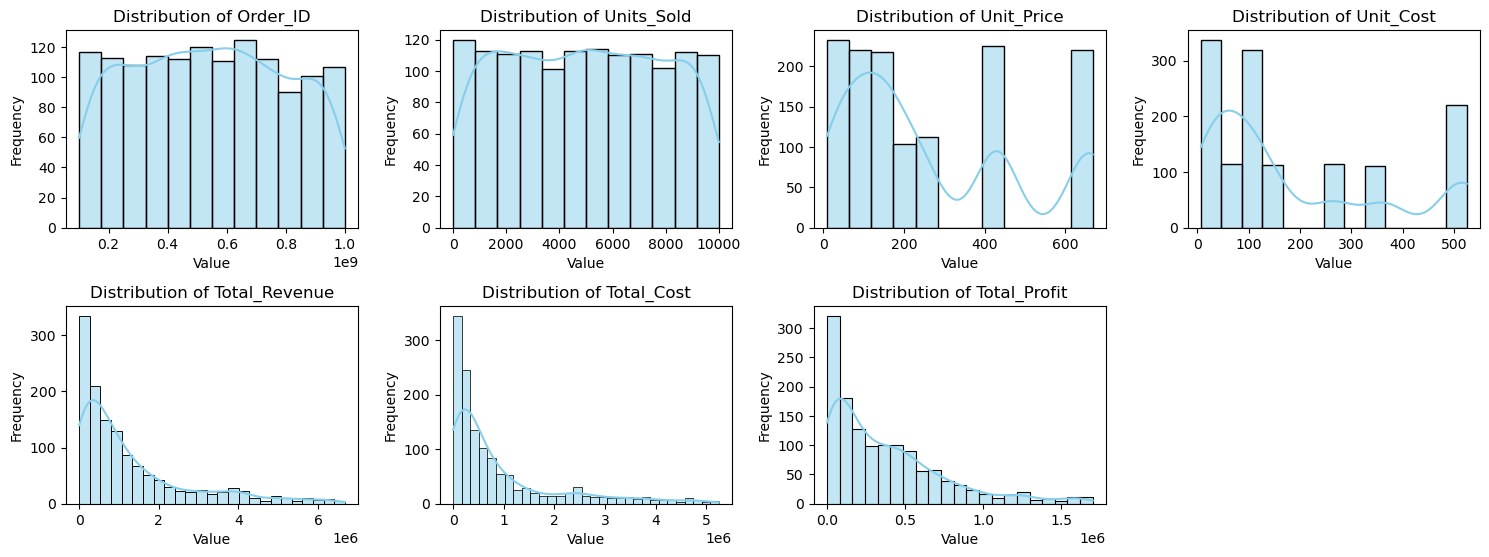

In [16]:
# Now first of all checking normality by histogram of each column numerical columns

num_col = df.select_dtypes(include=['int64', 'float64']).columns   # selecting numerical columns


plt.figure(figsize=(15, 8))
for i, column in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Result Observation

Except Order_ID and Units_sold column all of the columns contain skewness which can create hardels in further analysis so now I will normalize each of the numerical column.

## Normalizing through log Transformtion

In [17]:
from scipy.stats import boxcox, probplot
import numpy as np                            # importing essentail libraries

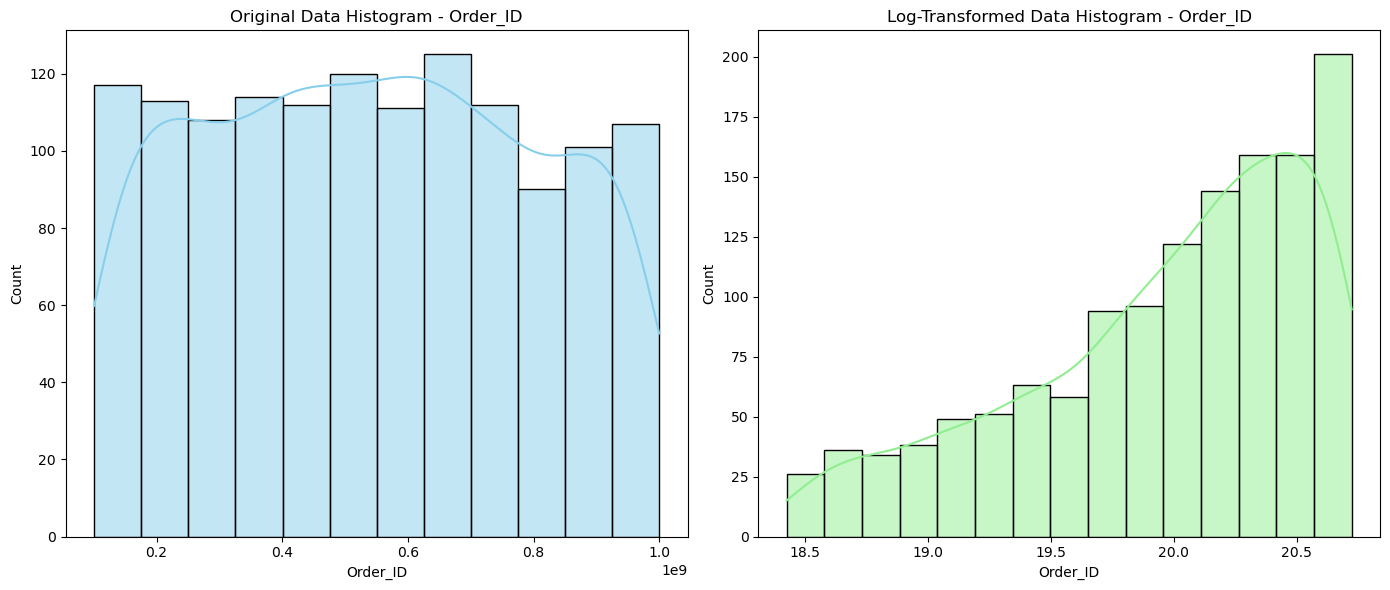

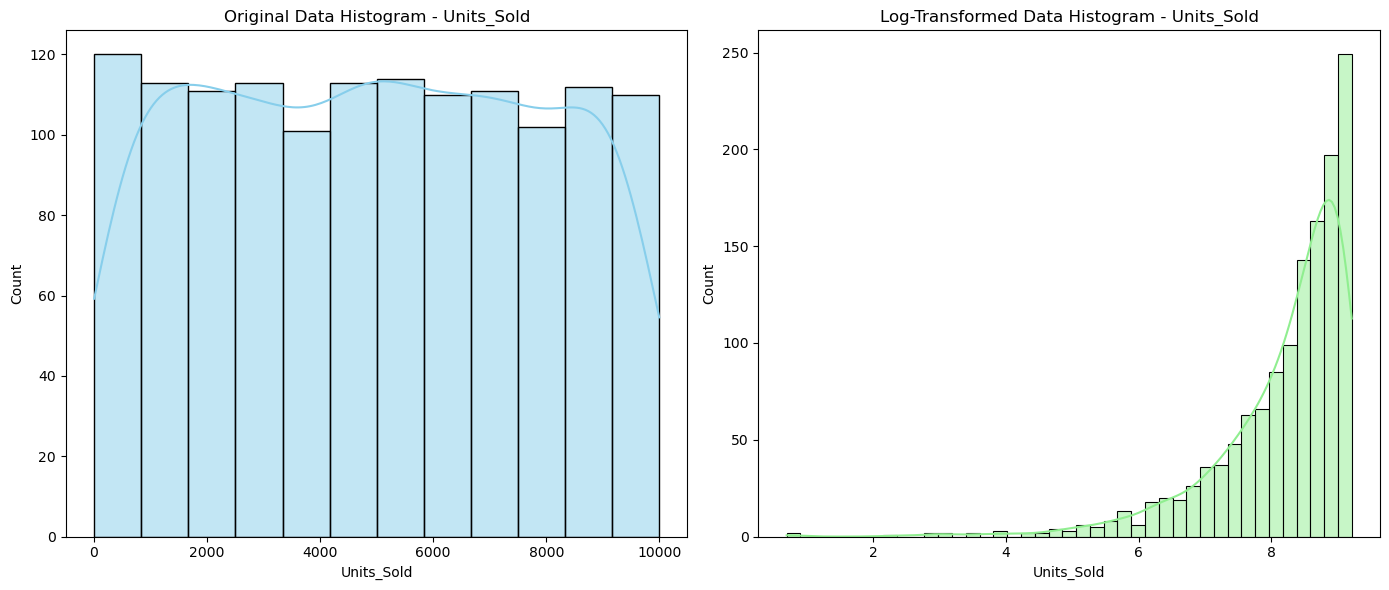

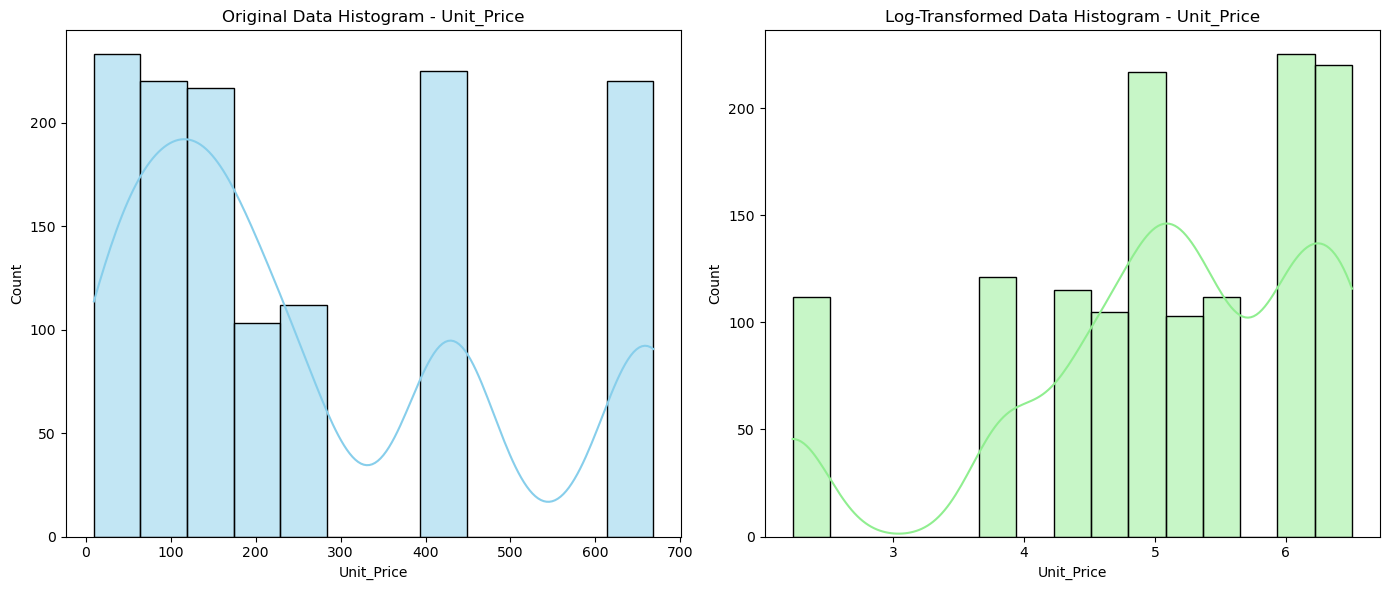

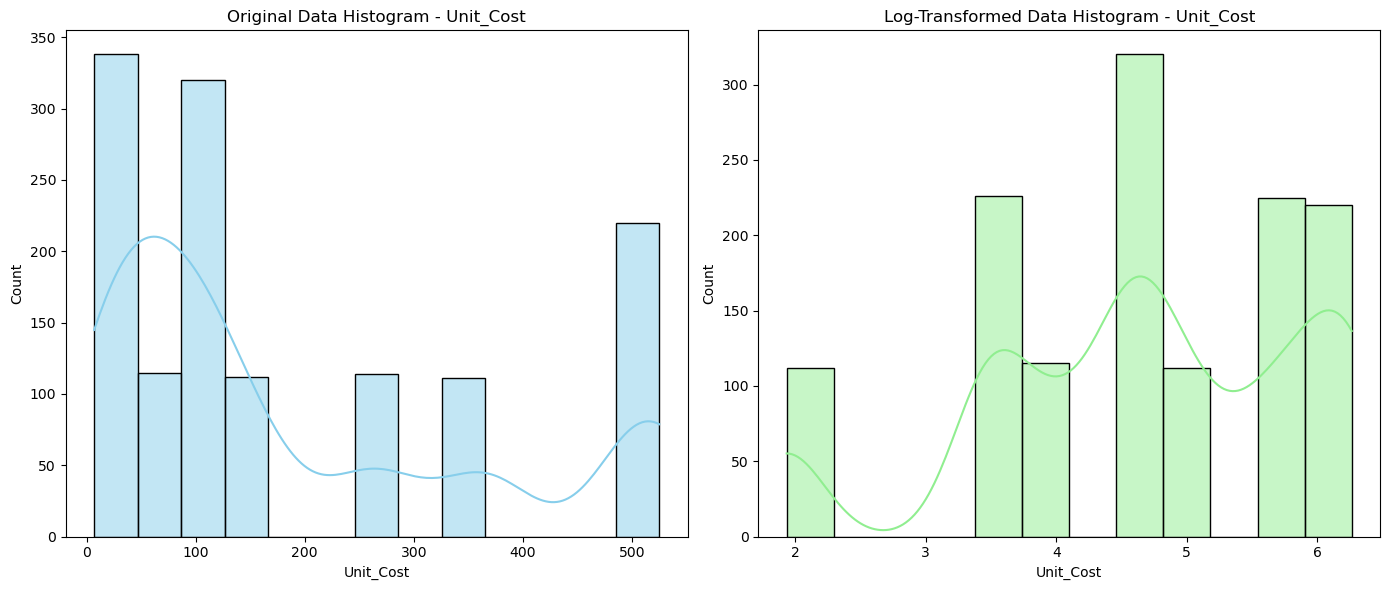

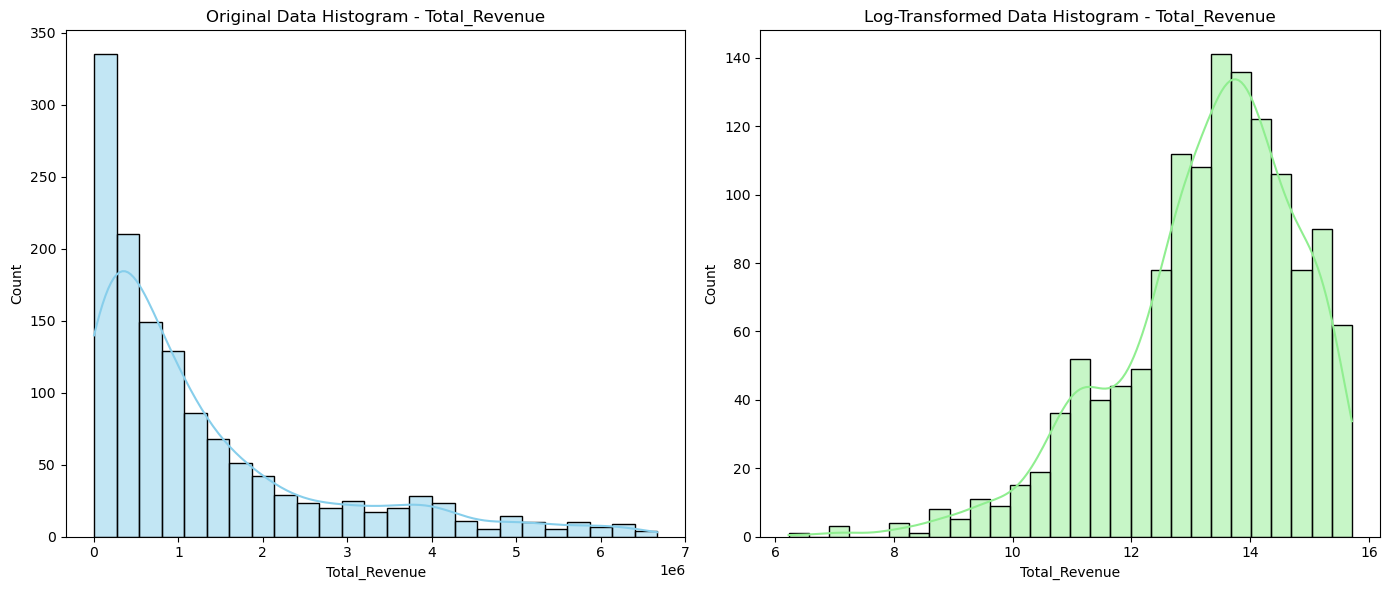

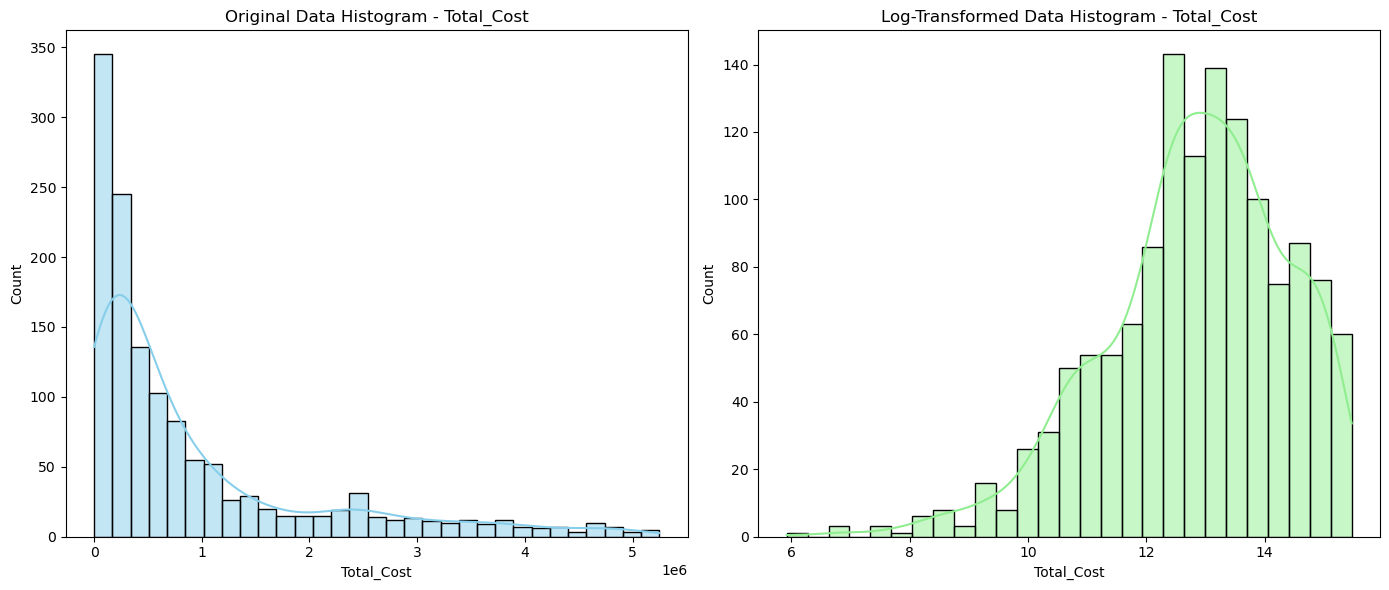

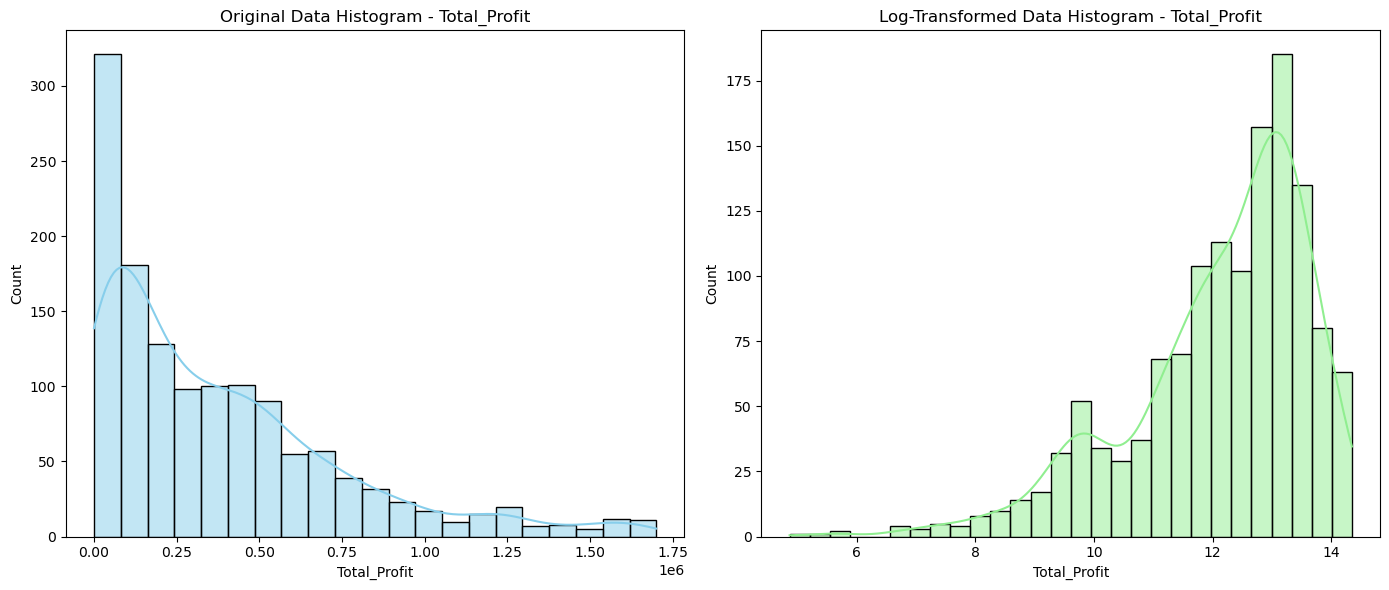

In [18]:
# Appling log transformation
df_log_transformed = df[num_col].apply(lambda x: np.where(x <= 0, np.nan, np.log(x)))

# Visualizing the original vs log-transformed data
for col in num_col:
    plt.figure(figsize=(14, 6))

    # Original data histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    plt.title(f"Original Data Histogram - {col}")

    # Log-transformed data histogram
    plt.subplot(1, 2, 2)
    sns.histplot(df_log_transformed[col].dropna(), kde=True, color='lightgreen')
    plt.title(f"Log-Transformed Data Histogram - {col}")

    plt.tight_layout()
    plt.show()


## Normalizing through BoxCox Transformtion

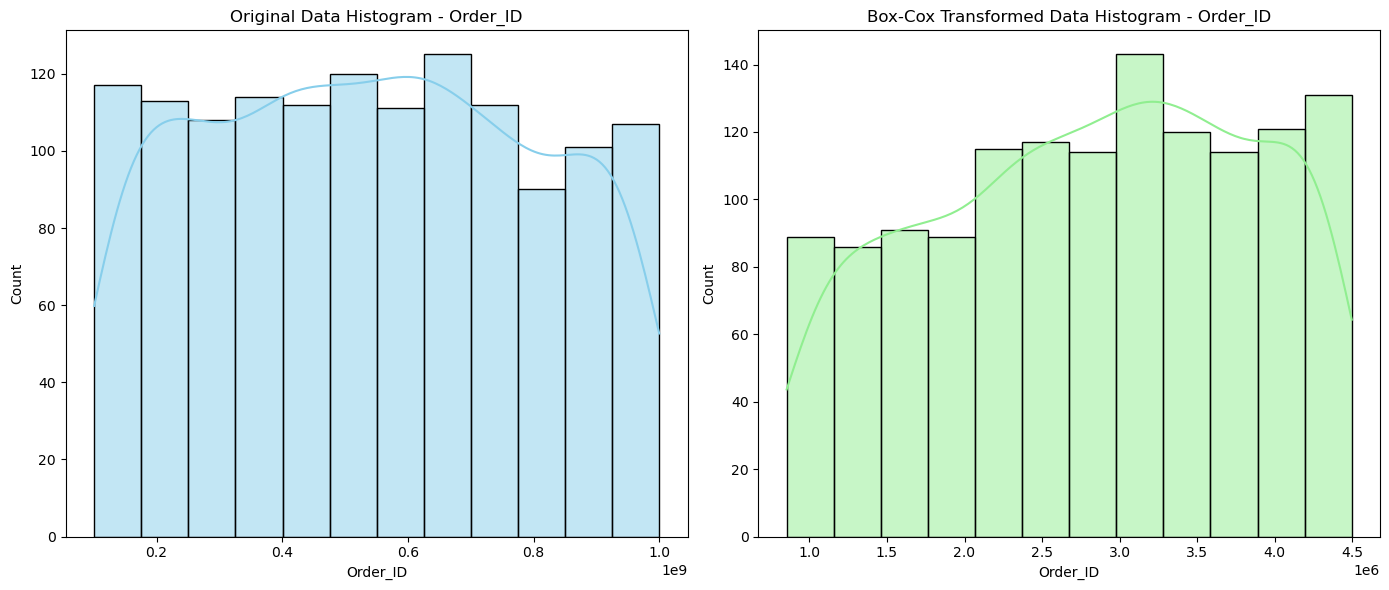

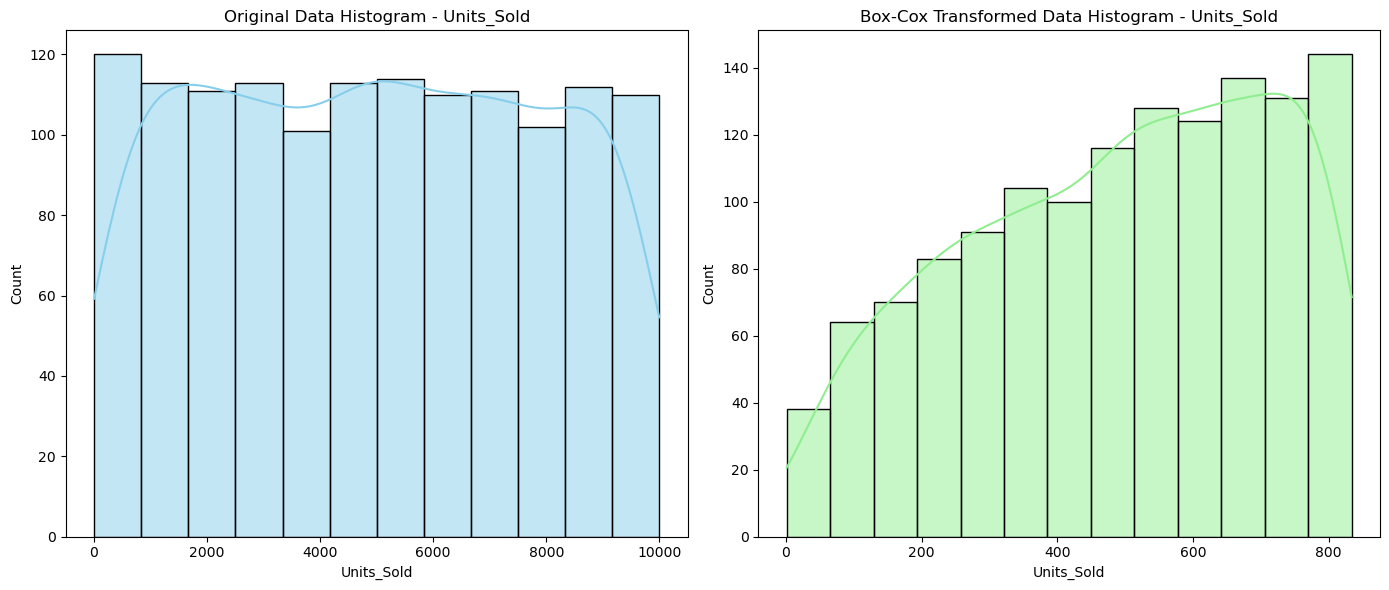

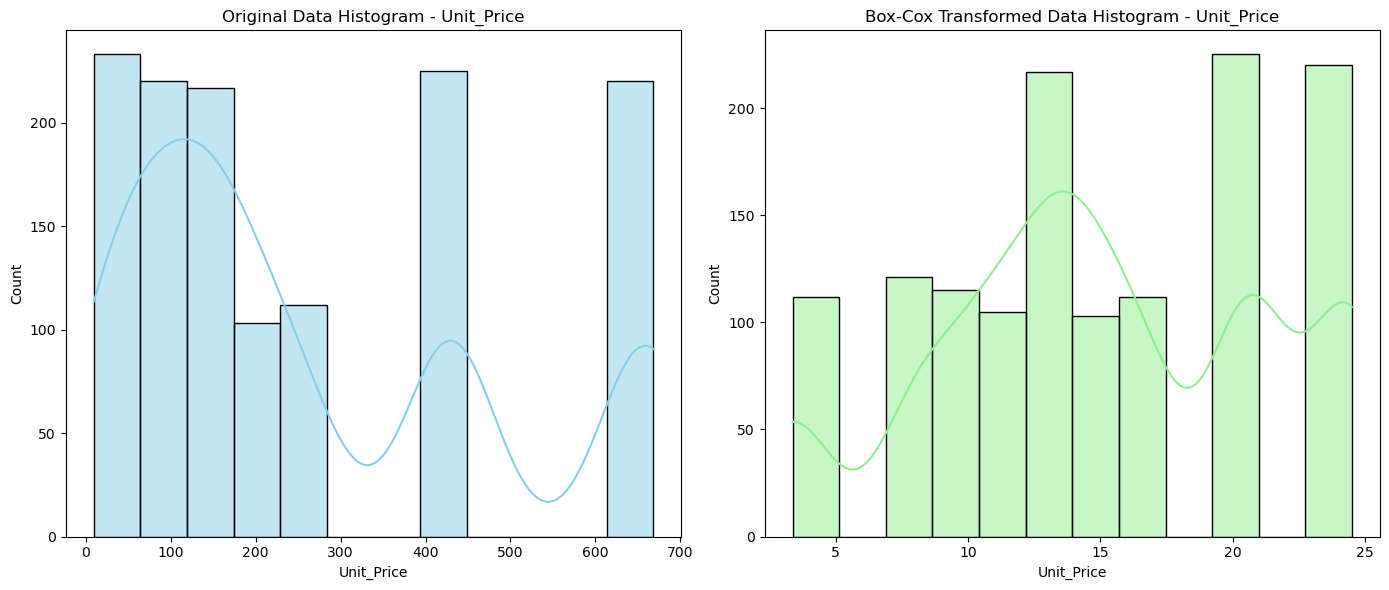

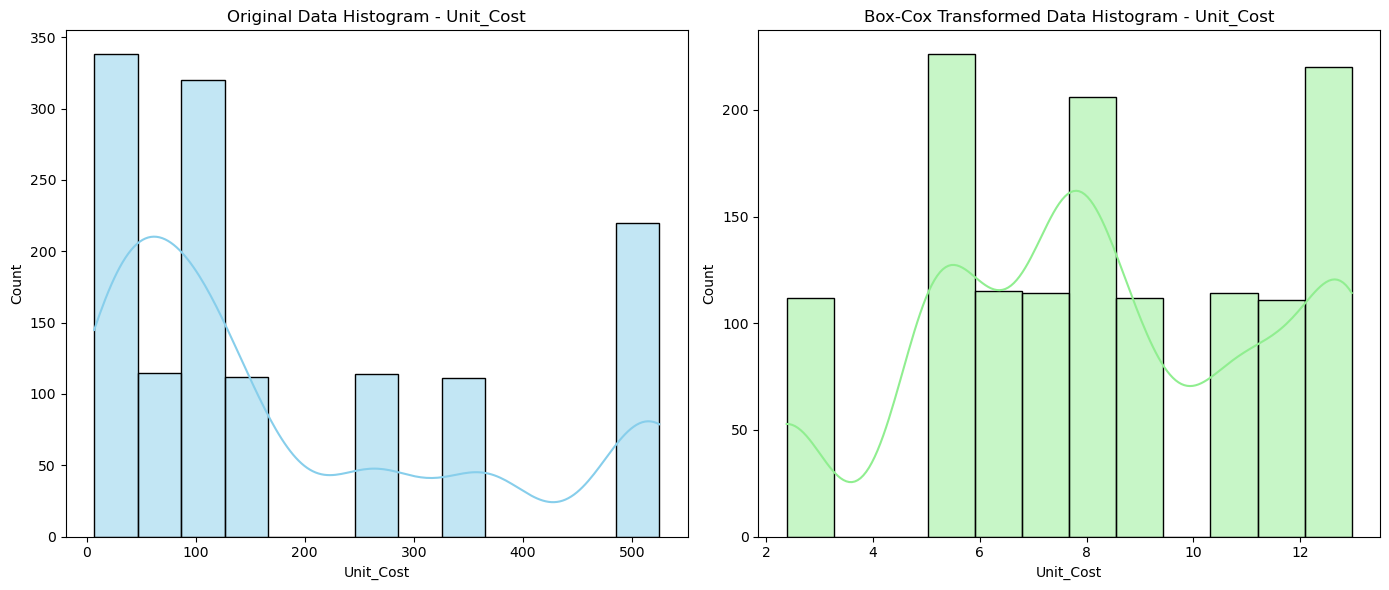

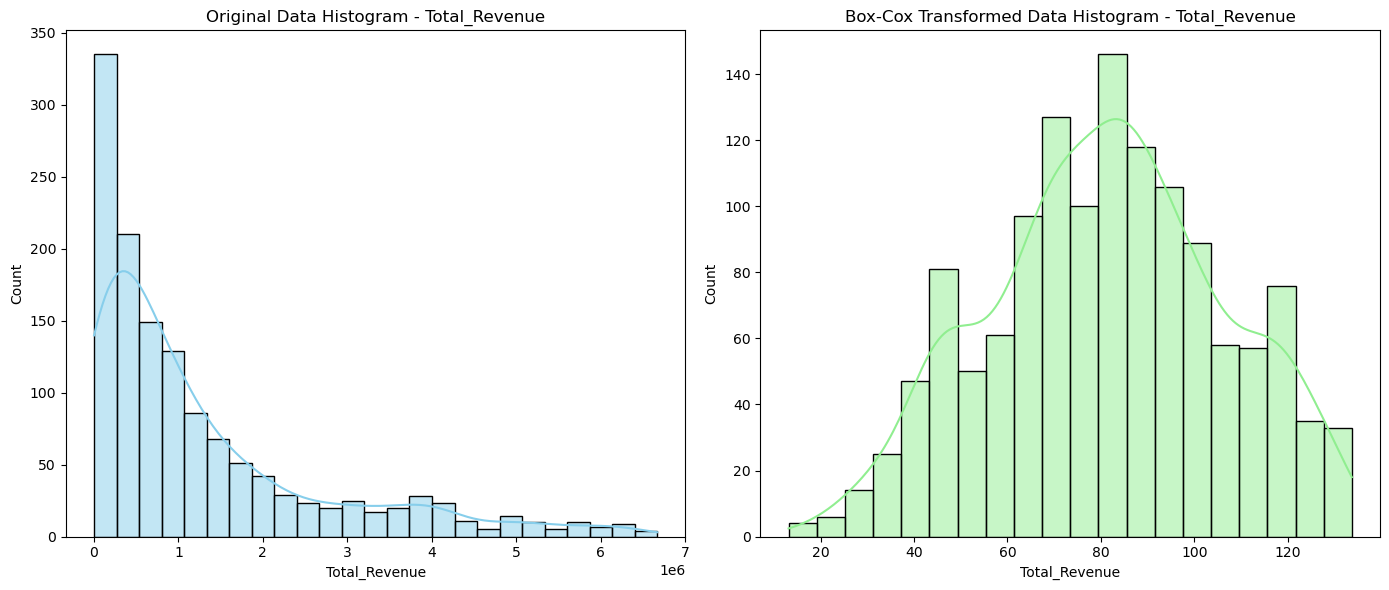

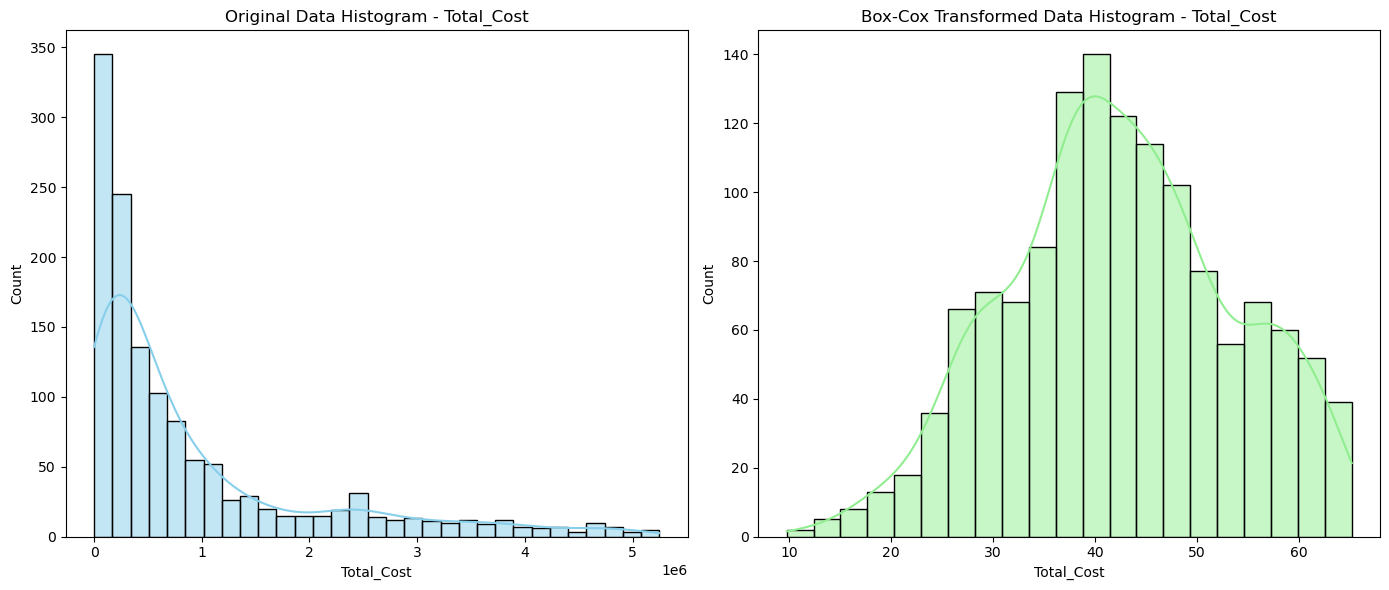

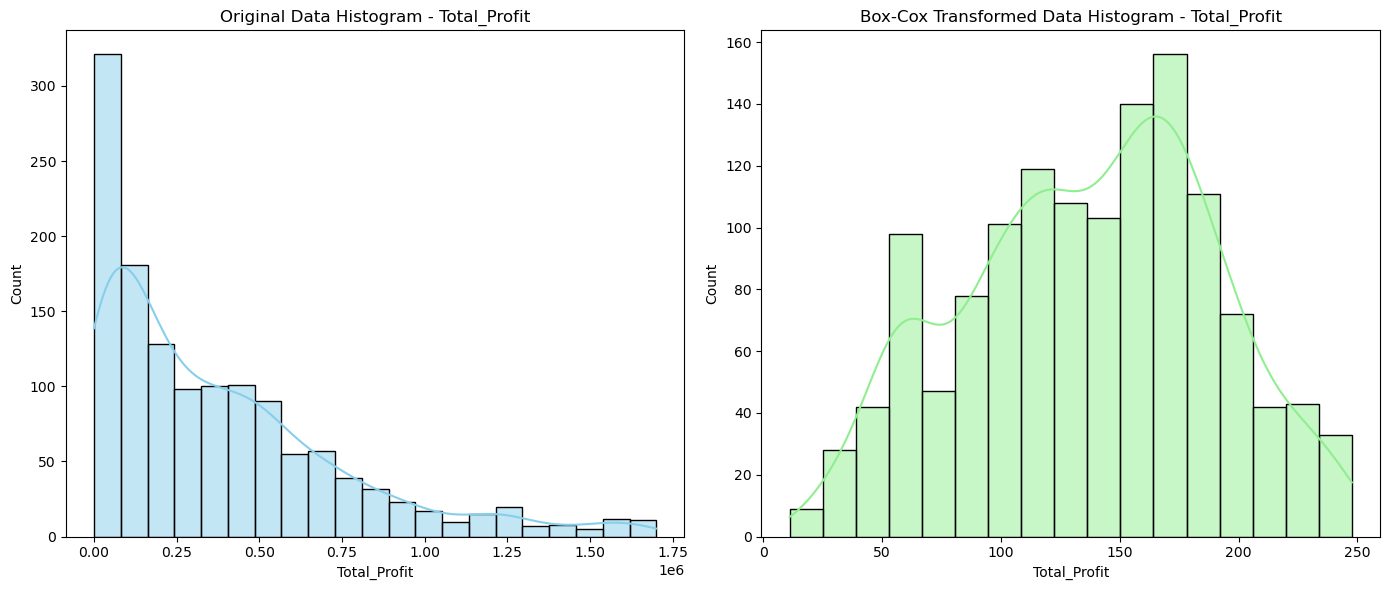

In [19]:
# making a new DataFrame for Box-Cox transformed columns
df_boxcox_transformed = df[num_col].copy()

# Appling Box-Cox transformation and visualizing the results
for col in num_col:
    
    positive_data = df[col][df[col] > 0]                        # Filtering non-positive values

    
    transformed_data, _ = boxcox(positive_data)                 # Apply Box-Cox transformation

    
    df_boxcox_transformed.loc[positive_data.index, col] = transformed_data           # Store the transformed data

   
    plt.figure(figsize=(14, 6))

    
    plt.subplot(1, 2, 1)                                               # Original data histogram
    sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    plt.title(f"Original Data Histogram - {col}")

    
    plt.subplot(1, 2, 2)                                                # Box-Cox transformed data histogram
    sns.histplot(df_boxcox_transformed[col].dropna(), kde=True, color='lightgreen')
    plt.title(f"Box-Cox Transformed Data Histogram - {col}")

    plt.tight_layout()
    plt.show()

## Comaprision Observations

**Log Transformation:**

It gives good results as it successfully remove some-how skewness in almost every column except Order_ID and Units_sold. But still you can observe the skewness.

**BoxCox Transformation:**

It gives the more accurate results than log Transformation as it successfully remove the skewness form all columns.

**Final OutPut:**
BoxCox gives good results than log transformation.

# Outlier Detection Using IQR and Z-Score

In [20]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Define the list of numerical columns
num_col = ['Order_ID', 'Units_Sold', 'Unit_Price', 'Unit_Cost', 'Total_Revenue', 'Total_Cost', 'Total_Profit']


iqr_outliers = {}                # Initializing dictionaries to store outlier information
zscore_outliers = {}


for col in num_col:              # IQR Method for Outlier Detection   
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Defining the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Finding outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    iqr_outliers[col] = outliers

    print(f"IQR Outliers in {col}: {len(outliers)}")  # result

    
    
# Z-Score Method for Outlier Detection
z_scores = np.abs(zscore(df[num_col]))  # Calculating Z-scores for each numerical column
threshold = 3  # Defining a Z-score threshold (e.g., Z-score > 3 is considered an outlier)
zscore_outliers = (z_scores > threshold).sum(axis=0)

print("Z-Score Outliers per column:")
print(dict(zip(num_col, zscore_outliers)))


IQR Outliers in Order_ID: 0
IQR Outliers in Units_Sold: 0
IQR Outliers in Unit_Price: 0
IQR Outliers in Unit_Cost: 0
IQR Outliers in Total_Revenue: 102
IQR Outliers in Total_Cost: 143
IQR Outliers in Total_Profit: 53
Z-Score Outliers per column:
{'Order_ID': 0, 'Units_Sold': 0, 'Unit_Price': 0, 'Unit_Cost': 0, 'Total_Revenue': 30, 'Total_Cost': 31, 'Total_Profit': 28}


# Outlier Handling

## Method 1: Flooring Outliers Using IQR Bounds

In [21]:
# Flooring Outliers using IQR bounds
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    
    lower_bound = Q1 - 1.5 * IQR           # Defining bounds
    upper_bound = Q3 + 1.5 * IQR

    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])            # flooring the outliers
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers have been floored using IQR bounds.")


Outliers have been floored using IQR bounds.


## Method  2: Removing Outliers Using IQR Method

In [22]:
# Removing outliers using IQR method
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    
    lower_bound = Q1 - 1.5 * IQR                  # Defining bounds
    upper_bound = Q3 + 1.5 * IQR

    # Filtering out the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers have been removed using IQR method.")


Outliers have been removed using IQR method.


# Adding a Ship_Day column to dataset for further analysis

In [23]:
df.columns

Index(['Region', 'Country', 'Item_Type', 'Sales_Channel', 'Order_Priority',
       'Order_Date', 'Order_ID', 'Ship_Date', 'Units_Sold', 'Unit_Price',
       'Unit_Cost', 'Total_Revenue', 'Total_Cost', 'Total_Profit'],
      dtype='object')

In [24]:
df['Shipping_Days'] = (df['Ship_Date'] - df['Order_Date']).dt.days

In [25]:
df.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Shipping_Days
0,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030.0,2011-09-29,4778.0,47.45,31.79,226716.100,1.518926e+05,74823.48,17
1,Europe,Bosnia and Herzegovina,Clothes,Online,M,2013-10-14,919133651.0,2013-11-04,927.0,109.28,35.84,101302.560,3.322368e+04,68078.88,21
2,Europe,Austria,Cereal,Offline,C,2014-08-13,987410676.0,2014-09-06,5616.0,205.70,117.11,1155211.200,6.576898e+05,497521.44,24
3,Europe,Bulgaria,Office Supplies,Online,L,2010-10-31,672330081.0,2010-11-29,6266.0,651.21,524.96,3957714.115,2.534214e+06,791082.50,29
4,Europe,Estonia,Fruits,Online,L,2016-09-28,579463422.0,2016-11-01,4958.0,9.33,6.92,46258.140,3.430936e+04,11948.78,34


# Saving the cleaned Data

In [26]:
df.to_excel("Cleaned_data.xlsx")